
<img src="https://vsqfvsosprmjdktwilrj.supabase.co/storage/v1/object/public/images/insights/1753644539114-netflix.jpeg" width=500px>

# Netflix
You are analyzing the `netflix_titles` dataset, which contains a list of all movies and TV shows available on Netflix along with metadata like cast, directors, ratings, and release years.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

netflix_path = "https://raw.githubusercontent.com/Armagaan/noc26_cs86/refs/heads/main/data/netflix_titles.csv"
netflix_df = pd.read_csv(netflix_path)

## 1. Data Loading and Basic Inspection
- Load the dataset into a DataFrame called `netflix_df`.
- Display the first 10 rows to understand the structure
- Find out the number of shows (movies, TV shows, etc.) and attributes in the dataset.

In [2]:
print(f"\nThe dataset has {netflix_df.shape[0]} shows and {netflix_df.shape[1]} attributes.")

print()

print("First 10 rows:")
netflix_df.head(10)


The dataset has 6234 shows and 12 attributes.

First 10 rows:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...


## 2. Data Profiling
- Check the data types of each column.
- Then, generate a concise summary of the DataFrame to identify which columns have missing (null) values.
- The dataframe view provides a broad overview. Write a function to inspect individual rows. The function to should print the column names followed by their values.

In [3]:
print("\nColumn Data Types:")
print(netflix_df.dtypes)

print("\nDataFrame Summary:")
netflix_df.info()


Column Data Types:
show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

DataFrame Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description 

In [4]:
def inspect_row(rid: int) -> None:
    for c in netflix_df.columns:
        print(f"{c:>12} : {netflix_df.iloc[rid][c]}")

In [5]:
inspect_row(5)

     show_id : 80163890
        type : TV Show
       title : Apaches
    director : nan
        cast : Alberto Ammann, Eloy Azorín, Verónica Echegui, Lucía Jiménez, Claudia Traisac
     country : Spain
  date_added : September 8, 2017
release_year : 2016
      rating : TV-MA
    duration : 1 Season
   listed_in : Crime TV Shows, International TV Shows, Spanish-Language TV Shows
 description : A young journalist is forced into a life of crime to save his father and family in this series based on the novel by Miguel Sáez Carral.


## 3. Column Filtering
- Create a smaller DataFrame named `titles_info` that only includes the title, type, release_year, and rating.
- Display the last 10 rows of this subset.

In [6]:
titles_info = netflix_df[["title", "type", "release_year", "rating"]]

print("\nLast 10 rows of subset:")
titles_info.tail(10)


Last 10 rows of subset:


,title,type,release_year,rating
6224,Anthony Bourdain: Parts Unknown,TV Show,2018,TV-PG
6225,Frasier,TV Show,2003,TV-PG
6226,La Familia P. Luche,TV Show,2012,TV-14
6227,The Adventures of Figaro Pho,TV Show,2015,TV-Y7
6228,Kikoriki,TV Show,2010,TV-Y
6229,Red vs. Blue,TV Show,2015,NR
6230,Maron,TV Show,2016,TV-MA
6231,Little Baby Bum: Nursery Rhyme Friends,Movie,2016,NaN
6232,A Young Doctor's Notebook and Other Stories,TV Show,2013,TV-MA
6233,Friends,TV Show,2003,TV-14


## 4. Slicing and Indexing

- A. Use iloc to select the first 10 rows and the first 5 columns.

- B. Use loc to extract the title and country for the rows with index labels 100 to 105 (inclusive).

- C. Use indexing to find the very last title in the dataset.

In [7]:
# 4. Slicing and Indexing
# A. First 10 rows and first 5 columns
subset_iloc = netflix_df.iloc[0:10, 0:5]
subset_iloc

,show_id,type,title,director,cast
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole..."
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ..."
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins..."
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,..."
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano
8,80117902,TV Show,Fire Chasers,NaN,NaN
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar..."


In [8]:
# B. Label-based selection for rows 100-105
netflix_df.loc[100:105, ["title", "country"]]

,title,country
100,Deliha 2,Turkey
101,Dragons: Rescue Riders,NaN
102,In the Shadow of the Moon,United States
103,Skylines,NaN
104,Sturgill Simpson Presents Sound & Fury,United States
105,The Politician,United States


In [9]:
# Notice the difference between loc and iloc. iloc would use 100:106
netflix_df.iloc[100:106][["title", "country"]]

,title,country
100,Deliha 2,Turkey
101,Dragons: Rescue Riders,NaN
102,In the Shadow of the Moon,United States
103,Skylines,NaN
104,Sturgill Simpson Presents Sound & Fury,United States
105,The Politician,United States


In [10]:
# C. Get the last title
last_title = netflix_df.iloc[-1]["title"]
print(f"\nThe last title in the list is: {last_title}")


The last title in the list is: Friends


In [11]:
inspect_row(-1)

     show_id : 70153404
        type : TV Show
       title : Friends
    director : nan
        cast : Jennifer Aniston, Courteney Cox, Lisa Kudrow, Matt LeBlanc, Matthew Perry, David Schwimmer
     country : United States
  date_added : nan
release_year : 2003
      rating : TV-14
    duration : 10 Seasons
   listed_in : Classic & Cult TV, TV Comedies
 description : This hit sitcom follows the merry misadventures of six 20-something pals as they navigate the pitfalls of work, life and love in 1990s Manhattan.


## 5. Single-Level Grouping
Netflix categorizes content into "Movie" and "TV Show". Use groupby to find the total count of each content type available in the dataset.

In [12]:
type_counts = netflix_df.groupby('type').size()
print("\nContent Type Distribution:")
print(type_counts)


Content Type Distribution:
type
Movie      4265
TV Show    1969
dtype: int64


## 6. Multi-Level Grouping
- Group the data by both release_year and type.
- Then calculate the count of shows for each combination.
- Convert the result into a "flat" DataFrame so that release_year and type are regular columns.

In [13]:
# 6. Multi-Level Grouping
yearly_type_counts = netflix_df.groupby(['release_year', 'type']).size().rename("Count")
yearly_type_counts.head()

# This is a "Multi-indexed" dataframe.

,,Count
release_year,type,
1925,TV Show,1
1942,Movie,2
1943,Movie,3
1944,Movie,3
1945,Movie,3


In [14]:
# Indexing just the year
yearly_type_counts.loc[2020]

,Count
type,
Movie,6
TV Show,19


In [15]:
# Indexing both
yearly_type_counts.loc[2020]["Movie"]

np.int64(6)

In [16]:
# Flattening the dataset
flat_yearly_df = yearly_type_counts.reset_index()
print("\nFlattened Multi-Group (First 5 rows):")
flat_yearly_df.head()


Flattened Multi-Group (First 5 rows):


,release_year,type,Count
0,1925,TV Show,1
1,1942,Movie,2
2,1943,Movie,3
3,1944,Movie,3
4,1945,Movie,3


## 7. Trend Visualization
Filter the data for shows released after the year 2000. Group by release_year, count the number of titles for each year, and create a line plot to visualize how the volume of Netflix content has changed over the last two decades.

In [17]:
# Filter for 2000 onwards
mask = (netflix_df['release_year'] > 2000)
recent_shows = netflix_df[mask]
trend_data = recent_shows.groupby('release_year').size()

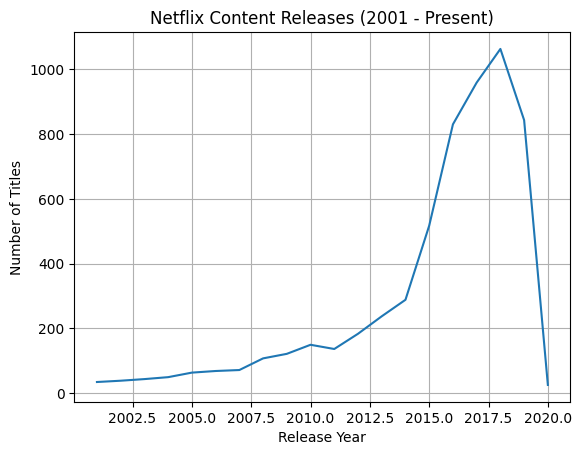

In [18]:
# Plotting
trend_data.plot(kind='line')
plt.title('Netflix Content Releases (2001 - Present)')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()

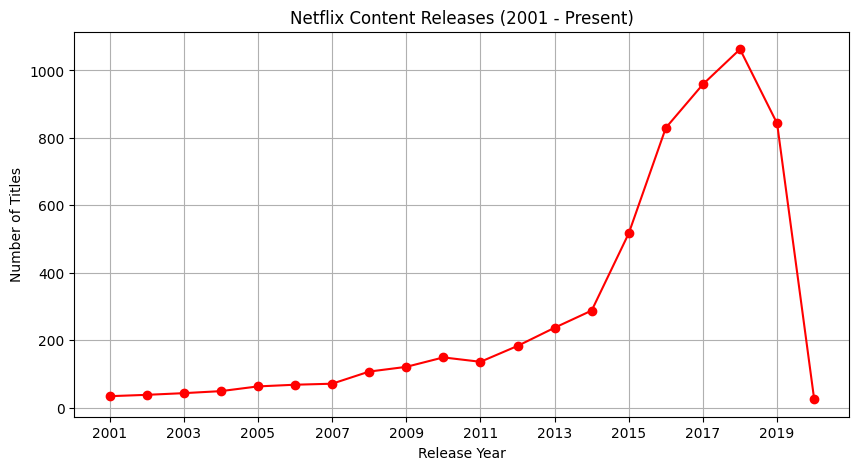

In [19]:
years = netflix_df["release_year"][mask].unique()
years = np.sort(years)

trend_data.plot(kind='line', marker='o', figsize=(10, 5), color='red')
plt.xticks(years[::2])
plt.title('Netflix Content Releases (2001 - Present)')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()